In [1]:
#importing the libraries
import numpy as np #for mathematical calculations
import cv2 #for face detection and other image operations
import dlib #for detection of facial landmarks ex:nose,jawline,eyes
from sklearn.cluster import KMeans #for clustering
from matplotlib import pyplot as plt
from os import walk
import pandas as pd
import math
from math import degrees
import imutils
import glob
import datetime
import shutil
import os

In [2]:
df2 = pd.read_csv("./SERVICE5_RESULT_DATA.csv", sep=',')
df2
del df2["NO"]
result = df2.drop_duplicates()
#result = df2
print(type(result))
print(result)

<class 'pandas.core.frame.DataFrame'>
       FACE_NO FACE_TYPE MASK_YN  IMG_HOR_SIZE  IMG_VER_SIZE IMG_EXT  \
0            6    oblong       N           332           500     jpg   
1            6    oblong       N           332           500     jpg   
2            6    oblong       N           332           500     jpg   
3            6    oblong       N           332           500     jpg   
4            6    oblong       N           332           500     jpg   
...        ...       ...     ...           ...           ...     ...   
23225        6    oblong       N           332           500     jpg   
23226        6    oblong       N           332           500     jpg   
23227        6    oblong       N           332           500     jpg   
23228        6    oblong       N           332           500     jpg   
23229        6    oblong       N           332           500     jpg   

       FRHD_LINE  CNTR_LINE  PHLT_LINE  CHIN_LINE    REG_DATE    MOD_DATE  \
0             38    

5101
ORG-19100741-S004-L4-E02-C7.jpg
5101
./INPUT/19100741/S004/L4/E02/C7.jpg
[(182, 110) (311, 239)]
5102
ORG-19100741-S004-L4-E03-C7.jpg
5102
./INPUT/19100741/S004/L4/E03/C7.jpg
[(182, 110) (311, 239)]
5103
ORG-19100741-S004-L5-E01-C7.jpg
5103
./INPUT/19100741/S004/L5/E01/C7.jpg
[(182, 110) (311, 239)]
5104
ORG-19100741-S004-L5-E02-C7.jpg
5104
./INPUT/19100741/S004/L5/E02/C7.jpg
[(182, 110) (311, 239)]
5105
ORG-19100741-S004-L5-E03-C7.jpg
5105
./INPUT/19100741/S004/L5/E03/C7.jpg
[(182, 110) (311, 239)]
5106
ORG-19100741-S004-L8-E01-C7.jpg
5106
./INPUT/19100741/S004/L8/E01/C7.jpg
[(182, 110) (311, 239)]
5107
ORG-19100741-S004-L8-E02-C7.jpg
5107
./INPUT/19100741/S004/L8/E02/C7.jpg
[(182, 110) (311, 239)]
5108
ORG-19100741-S004-L8-E03-C7.jpg
5108
./INPUT/19100741/S004/L8/E03/C7.jpg
[(182, 110) (311, 239)]
5109
ORG-19100741-S004-L9-E01-C7.jpg
5109
./INPUT/19100741/S004/L9/E01/C7.jpg
[(182, 110) (311, 239)]
5110
ORG-19100741-S004-L9-E02-C7.jpg
5110
./INPUT/19100741/S004/L9/E02/C7.jpg
[(18

AttributeError: 'float' object has no attribute 'split'

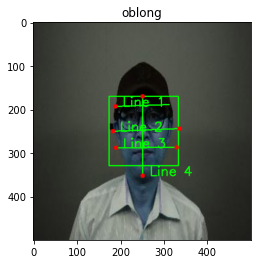

In [6]:
cc = 0 
face_cascade_path = "./haarcascade_frontalface_default.xml"
predictor_path = "./shape_predictor_68_face_landmarks.dat"

for f in result['ORG_IMG_URL']:
    
    fncheck = f.split("/")[-1]
    cc = cc + 1 
    
    if(cc <= 5100):
        continue
        
    if(cc > 5200):
        continue
    
    if(os.path.isfile("C:\\Users\\saima\\OneDrive\\바탕 화면\\에카디자인\\FaceShape-master\\OUTPUT\PRG\\" + fncheck) == False):
        
        print(cc)
        print(fncheck)
        
        result['ORG_IMG_URL']
        
        choice1 = (239, 207, 137)
        choice2 = 1
        
        fncheckL1 = fncheck.split("-")
        
        for i3 in range(cc,cc+1,1):

            print(i3)
            dataL3 = pd.DataFrame()

            #load the image   
            imagepath =  glob.glob('./INPUT/'+fncheckL1[1]+'/'+fncheckL1[2]+'/'+fncheckL1[3]+'/'+fncheckL1[4]+'/C7.jpg')[0]
            print(imagepath)
            org_path = "./OUTPUT4/" + fncheck
            outPath = "./OUTPUT4/" + fncheck.replace("ORG","FACE")
            outPath_mask = "./OUTPUT4/" + fncheck.replace("ORG","MASK")

            org_path_with_google = "http://210.178.19.87:9080/IMG/SERVICE5/ORG" + fncheck
            outPath_with_google = "http://210.178.19.87:9080/IMG/SERVICE5/FACE" + fncheck.replace("ORG","FACE")
            outPath_mask_with_google = "http://210.178.19.87:9080/IMG/SERVICE5/MASK" + fncheck.replace("ORG","MASK")

            #create the haar cascade for detecting face and smile
            faceCascade = cv2.CascadeClassifier(face_cascade_path)

            #create the landmark predictor
            predictor = dlib.shape_predictor(predictor_path)

            #read the image
            image = cv2.imread(imagepath)

            #resizing the image to 000 cols nd 500 rows
            image = cv2.resize(image, (500, 500)) 
            #making another copy
            original = image.copy()

            #convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            #apply a Gaussian blur with a 3 x 3 kernel to help remove high frequency noise
            gauss = cv2.GaussianBlur(gray,(3,3), 0)

            #Detect faces in the image
            faces = faceCascade.detectMultiScale(
                gauss,
                scaleFactor=1.05,
                minNeighbors=5,
                minSize=(100,100),
                flags=cv2.CASCADE_SCALE_IMAGE
                )

            #Detect faces in the image
            #print("found {0} faces!".format(len(faces)) )

            if(len(faces) != 1):
                result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': "",
                                        'detectFace' : len(faces),
                                        'faceClass' : "",
                                       'landmarkPoint' : ""}, ignore_index=True)
                continue

            for (x,y,w,h) in faces:
                #draw a rectangle around the faces
                cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
                #converting the opencv rectangle coordinates to Dlib rectangle
                dlib_rect = dlib.rectangle(int(x), int(y), int(x+w), int(y+h))
                #detecting landmarks
                detected_landmarks = predictor(image, dlib_rect).parts()
                #converting to np matrix
                landmarks = np.matrix([[p.x,p.y] for p in detected_landmarks])
                #landmarks array contains indices of landmarks.
                """
                #copying the image so we can we side by side
                landmark = image.copy()
                for idx, point in enumerate(landmarks):
                        pos = (point[0,0], point[0,1] )
                        #annotate the positions
                        cv2.putText(landmark,str(idx),pos,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,color=(0,0,255) )
                        #draw points on the landmark positions 
                        cv2.circle(landmark, pos, 3, color=(0,255,255))

            cv2.imshow("Landmarks by DLib", landmark)
            """
            #making another copy  for showing final results
            results = original.copy()

            for (x,y,w,h) in faces:
                #draw a rectangle around the faces
                cv2.rectangle(results, (x,y), (x+w,y+h), (0,255,0), 2)
                #making temporary copy
                temp = original.copy()
                #getting area of interest from image i.e., forehead (25% of face)
                forehead = temp[y:y+int(0.25*h), x:x+w]
                rows,cols, bands = forehead.shape
                X = forehead.reshape(rows*cols,bands)
                """
                Applying kmeans clustering algorithm for forehead with 2 clusters 
                this clustering differentiates between hair and skin (thats why 2 clusters)
                """
                #kmeans
                kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10, random_state=0)
                y_kmeans = kmeans.fit_predict(X)
                for i in range(0,rows):
                    for j in range(0,cols):
                        if y_kmeans[i*cols+j]==True:
                            forehead[i][j]=[255,255,255]
                        if y_kmeans[i*cols+j]==False:
                            forehead[i][j]=[0,0,0]
                #Steps to get the length of forehead
                #1.get midpoint of the forehead
                #2.travel left side and right side
                #the idea here is to detect the corners of forehead which is the hair.
                #3.Consider the point which has change in pixel value (which is hair)
                forehead_mid = [int(cols/2), int(rows/2) ] #midpoint of forehead
                lef=0 
                #gets the value of forehead point
                pixel_value = forehead[forehead_mid[1],forehead_mid[0] ]

                try:
                    for i in range(0,cols):
                        #enters if when change in pixel color is detected
                        if forehead[forehead_mid[1],forehead_mid[0]-i].all()!=pixel_value.all():
                            lef=forehead_mid[0]-i
                            break;
                    left = [lef,forehead_mid[1]]
                    rig=0
                    for i in range(0,cols):
                        #enters if when change in pixel color is detected
                        if forehead[forehead_mid[1],forehead_mid[0]+i].all()!=pixel_value.all():
                            rig = forehead_mid[0]+i
                            break;
                    right = [rig,forehead_mid[1]]
                except:
                    result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : "ERROR",
                                       'landmarkPoint' : ""}, ignore_index=True)

            #drawing line1 on forehead with circles
            #specific landmarks are used. 
            line1 = np.subtract(right+y,left+x)[0]
            cv2.line(results, tuple(x+left), tuple(y+right), color=(0,255,0), thickness = 2)
            cv2.putText(results,' Line 1',tuple(x+left),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
            cv2.circle(results, tuple(x+left), 5, color=(255,0,0), thickness=-1)        

            #drawing line 2 with circles
            linepointleft = (landmarks[1,0],landmarks[1,1])
            linepointright = (landmarks[15,0],landmarks[15,1])
            line2 = np.subtract(linepointright,linepointleft)[0]
            cv2.line(results, linepointleft,linepointright,color=(0,255,0), thickness = 2)
            cv2.putText(results,' Line 2',linepointleft,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
            cv2.circle(results, linepointleft, 5, color=(255,0,0), thickness=-1)    
            cv2.circle(results, linepointright, 5, color=(255,0,0), thickness=-1)    

            #drawing line 3 with circles
            linepointleft = (landmarks[3,0],landmarks[3,1])
            linepointright = (landmarks[13,0],landmarks[13,1])
            line3 = np.subtract(linepointright,linepointleft)[0]
            cv2.line(results, linepointleft,linepointright,color=(0,255,0), thickness = 2)
            cv2.putText(results,' Line 3',linepointleft,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
            cv2.circle(results, linepointleft, 5, color=(255,0,0), thickness=-1)    
            cv2.circle(results, linepointright, 5, color=(255,0,0), thickness=-1)    

            #drawing line 4 with circles
            linepointbottom = (landmarks[8,0],landmarks[8,1])
            linepointtop = (landmarks[8,0],y)
            line4 = np.subtract(linepointbottom,linepointtop)[1]
            cv2.line(results,linepointtop,linepointbottom,color=(0,255,0), thickness = 2)
            cv2.putText(results,' Line 4',linepointbottom,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
            cv2.circle(results, linepointtop, 5, color=(255,0,0), thickness=-1)    
            cv2.circle(results, linepointbottom, 5, color=(255,0,0), thickness=-1)    
            #print(line1,line2,line3,line4)

            similarity = np.std([line1,line2,line3])
            #print("similarity=",similarity)
            ovalsimilarity = np.std([line2,line4])
            #print('diam=',ovalsimilarity)

            #we use arcustangens for angle calculation
            ax,ay = landmarks[3,0],landmarks[3,1]
            bx,by = landmarks[4,0],landmarks[4,1]
            cx,cy = landmarks[5,0],landmarks[5,1]
            dx,dy = landmarks[6,0],landmarks[6,1]

            alpha0 = math.atan2(cy-ay,cx-ax)
            alpha1 = math.atan2(dy-by,dx-bx)
            alpha = alpha1-alpha0
            angle = abs(degrees(alpha))
            angle = 180-angle

            faceType = ""

            for ii in range(1):
                if similarity<10:
                    if angle<160:
                        faceType = "squared"
                        faceNo = 1
                        result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : faceType,
                                       'landmarkPoint' : landmarks}, ignore_index=True)
                        break
                    else:
                        faceType = "round"
                        faceNo = 2
                        result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : faceType,
                                       'landmarkPoint' : landmarks}, ignore_index=True)
                        break

                if line3>line1:
                    if angle<160:
                        faceType = "triangle"
                        faceNo = 3
                        result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : faceType,
                                       'landmarkPoint' : landmarks}, ignore_index=True)
                        break

                if ovalsimilarity<10:

                    faceType = "diamond"
                    faceNo = 4
                    result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : faceType,
                                       'landmarkPoint' : landmarks}, ignore_index=True)
                    break        
                if line4 > line2:
                    if angle<160:
                        faceType = "rectangular"
                        faceNo = 5
                        result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : faceType,
                                       'landmarkPoint' : landmarks}, ignore_index=True)
                        break;
                    else:
                        faceType = "oblong"
                        faceNo = 6
                        result = result.append({'rawImagePath': imagepath,
                                        'outImagePath': outPath,
                                        'detectFace' : len(faces),
                                        'faceClass' : faceType,
                                       'landmarkPoint' : landmarks}, ignore_index=True)
                        break;

                print("Damn! Contact the developer")

            
            ############################################################################################################################################
            img = cv2.imread(imagepath)
            img = imutils.resize(img, width = 500)
            gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            #  initialization dlib Face detector 
            detector = dlib.get_frontal_face_detector()


            """
            Detect faces in grayscale images and create an object - Stores a list of coordinates for the bounding rectangle
            In the second parameter “1” Indicates that the image should be sampled up 1 Time . 
            This makes the image bigger , And allow us to detect more faces
            """

            #  File path 
            p = "shape_predictor_68_face_landmarks.dat"

            predictor = dlib.shape_predictor(p)
            #  Use predictors to get shapes 
            
            faces = detector(gray, 1)
            
            for face in faces:
                print(face)
                landmarks = predictor(gray, face)

            points = []

            try:
                for i in range(1, 16):
                    point = [landmarks.part(i).x, landmarks.part(i).y]
                    points.append(point)

                    # print(points).
                    #  wide , High coverage masks 
                    mask_a = [((landmarks.part(42).x), (landmarks.part(15).y)),
                              ((landmarks.part(27).x), (landmarks.part(27).y)),
                              ((landmarks.part(39).x), (landmarks.part(1).y))]
                    #  wide , In the middle of the mask 
                    mask_c = [((landmarks.part(29).x), (landmarks.part(29).y))]
                    #  wide 、 Low coverage masks 
                    mask_e = [((landmarks.part(35).x), (landmarks.part(35).y)),
                              ((landmarks.part(34).x), (landmarks.part(34).y)),
                              ((landmarks.part(33).x), (landmarks.part(33).y)),
                              ((landmarks.part(32).x), (landmarks.part(32).y)),
                              ((landmarks.part(31).x), (landmarks.part(31).y))]
                    fmask_a = points + mask_a
                    fmask_c = points + mask_c
                    fmask_e = points + mask_e
                    # mask_type = {1: fmask_a, 2: fmask_c, 3: fmask_e}
                    # mask_type[choice2]
                    #  Use Python OpenCV - cv2.polylines() Method is [mask_type] Draw the mask outline :
                    # fmask_a = wide, high coverage mask,
                    # fmask_c = wide, medium coverage mask,
                    # fmask_e  = wide, low coverage mask
                    fmask_a = np.array(fmask_a, dtype=np.int32)
                    fmask_c = np.array(fmask_c, dtype=np.int32)
                    fmask_e = np.array(fmask_e, dtype=np.int32)
                    mask_type = {1: fmask_a, 2: fmask_c, 3: fmask_e}
                    mask_type[choice2]
                    #  Change parameters [mask_type] and color_type For various combinations 
                    img2 = cv2.polylines(img, [mask_type[choice2]], True, choice1, thickness=2, lineType=cv2.LINE_8)
                    #  Use Python OpenCV - cv2.fillPoly() How to fill the mask 
                    #  Change parameters [mask_type] and color_type For various combinations 
                    img3 = cv2.fillPoly(img2, [mask_type[choice2]], choice1, lineType=cv2.LINE_AA)
            except:
                continue
                
            
            #output = np.concatenate((results), axis=1)
            plt.imshow(results)
            plt.title(faceType)
            #plt.savefig(outPath)
            plt.savefig(outPath, bbox_inches='tight')
            cv2.imwrite(outPath_mask, img3)
            shutil.copyfile( imagepath , org_path )

            #print(point)

    
